In [2]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

CDC by age

In [4]:
#age_sex_data = pd.read_csv("../Folder1/Death_Counts_by_Sex_Age_and_State.csv")

In [5]:
age_data = age_sex_data.loc[(age_sex_data['Sex'] == 'All Sexes')]
#age_data = age_data.loc[age_data['State'] == 'United States']
#age_data = age_data.loc[age_data['Age Group'] == '85 years and over']
age_data = age_data.loc[age_data['Group']== 'By Total']
age_data

NameError: name 'age_sex_data' is not defined

In [ ]:
del age_data['Footnote']
del age_data['Data As Of']
del age_data['Sex']
del age_data['Pneumonia Deaths']
del age_data['Pneumonia and COVID-19 Deaths']
del age_data['Influenza Deaths']
del age_data['Pneumonia, Influenza, or COVID-19 Deaths']

In [ ]:
age_data = age_data.fillna(0)
#age_data.head()

In [ ]:
age_data = age_data.reset_index(drop=True)
age_data

In [ ]:
age_data.to_csv("../Folder2/us-age-data.csv", index=False, header=True)

In [ ]:
age_data.to_csv("../Folder2/age-data.csv", index=False, header=True)

CDC by sex


In [ ]:
sex_data = pd.read_csv("../Folder1/Death_Counts_by_Sex_Age_and_State.csv")
#sex_data.head()

In [ ]:
all_ages = sex_data.loc[sex_data['Age Group'] == 'All Ages']
all_ages = all_ages.loc[all_ages['Group']=='By Total']
sex_state = all_ages.loc[all_ages['State']!='Puerto Rico']
sex_state = sex_state.loc[sex_state['State']!='United States']
sex_state = sex_state.loc[sex_state['State']!='District of Columbia']
sex_data = sex_state.loc[sex_state['Sex'] != 'All Sexes']

In [ ]:
del sex_data['Footnote']
del sex_data['Data As Of']
del sex_data['Age Group']
del sex_data['Pneumonia Deaths']
del sex_data['Pneumonia and COVID-19 Deaths']
del sex_data['Influenza Deaths']
del sex_data['Pneumonia, Influenza, or COVID-19 Deaths']
sex_data = sex_data.fillna(0)

In [ ]:
sex_data = sex_data.reset_index(drop=True)
sex_data.head()

In [ ]:
sex_data.to_csv("../Folder2/sex-data.csv", index=False, header=True)

Race Data from CDC

In [ ]:
race_ethnicity_data = pd.read_csv("../Folder1/race-ethnicity.csv")

In [ ]:
del race_ethnicity_data['Footnote']
del race_ethnicity_data['Data as of']

In [ ]:
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['Group'] == 'By Total')]
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['State'] == 'United States')]
#race_ethnicity_data = race_ethnicity_data.loc[race_ethnicity_data['State']!='District of Columbia']
#race_ethnicity_data = race_ethnicity_data.loc[race_ethnicity_data['Indicator']!='Unweighted distribution of population (%)']
race_ethnicity_data = race_ethnicity_data.fillna(0)
#race_ethnicity_data.head()

In [ ]:
race_ethnicity_data.rename(columns={"Non-Hispanic White": "White", "Non-Hispanic Black or African American": "Black or African American", "Non-Hispanic American Indian or Alaska Native":
                               "American Indian or Alaska Native", "Non-Hispanic Asian": "Asian", "Non-Hispanic Native Hawaiian or Other Pacific Islander": "Native Hawaiian or Other Pacific Islander",
                               "Deaths_AIAN": "Deaths: AIAN", "Deaths_NHPI": "Deaths: NHPI", "Deaths_Multiracial": "Deaths: Multiracial",
                               "Non Hispanic more than one race": "More Than One Race"})
race_ethnicity_data

In [ ]:
distribution = race_ethnicity_data.loc[race_ethnicity_data['Indicator'] == 'Distribution of COVID-19 deaths (%)']
distribution

In [ ]:
#dis_list = []
#dis_list.append(white)
#dis_list

In [ ]:
race_ethnicity_data = race_ethnicity_data.reset_index(drop=True)

In [ ]:
race_ethnicity_data.to_csv("../Folder2/race-population-data.csv", index=False, header=True)

trying to merge

In [ ]:
race_data = pd.read_csv("../Folder2/race-population-data.csv")
#race_data.head()

In [ ]:
age_data = pd.read_csv("../Folder2/us-age-data.csv")
age_data

In [ ]:
age_data = age_data.loc[age_data['Age Group'] != "18-29 years"]
age_data = age_data.loc[age_data['Age Group'] != "0-17 years"]
age_data = age_data.loc[age_data['Age Group'] != "Under 1 year"]
age_data = age_data.loc[age_data['Age Group'] != "30-39 years"]
age_data = age_data.loc[age_data['Age Group'] != "40-49 years"]
age_data = age_data.loc[age_data['Age Group'] != "50-64 years"]
age_data = age_data.loc[age_data['State'] != "Puerto Rico"]
age_data = age_data.loc[age_data['State'] != "District of Columbia"]
age_data = age_data.loc[age_data['State'] != "New York City"]

In [ ]:
age_data['Age Group'] = age_data['Age Group'].replace(
    {'1-4 years': 'Under 5 years'})

In [ ]:
age_data

In [ ]:
del age_data['Month']
del age_data['Year']

In [ ]:
age_data

In [ ]:
pop_data = pd.read_csv("../Folder2/Population_byCDCAgeGroup_byState.csv")

In [ ]:
pop_data = pop_data.rename(columns={"CDC_AgeGroups":"Age Group"})
totals = pop_data.loc[pop_data['Age Group']=='Total']


In [ ]:
merged_df = pd.merge(age_data, pop_data,  how='left', left_on=['State','Age Group'], right_on = ['State','Age Group'])

In [ ]:
#merged_df = merged_df.loc[merged_df['State']!='United States']
merged_df = merged_df.loc[merged_df['Age Group']!='All Ages']
merged_df

In [ ]:

del merged_df['Total Deaths']

In [ ]:
merged_df

In [ ]:
merged_df.to_csv("../Folder3/age-pop-state.csv", index=False, header=True)

In [ ]:
age_data2 = pd.read_csv("../Folder1/Death_Counts_by_Sex_Age_and_State.csv")

In [ ]:
age_data2 = age_data2.loc[(age_data2['Sex'] == 'All Sexes')]
age_data2 = age_data2.loc[age_data2['State'] == 'United States']
#age_data = age_data.loc[age_data['Age Group'] == '85 years and over']
age_data2 = age_data2.loc[age_data2['Group']== 'By Total']
age_data2 = age_data2.loc[age_data2['Age Group'] != "18-29 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "0-17 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "Under 1 year"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "30-39 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "40-49 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "50-64 years"]
age_data2 = age_data2.loc[age_data2['State'] != "Puerto Rico"]
age_data2 = age_data2.loc[age_data2['State'] != "District of Columbia"]
age_data2 = age_data2.loc[age_data2['State'] != "New York City"]
del age_data2['Footnote']
del age_data2['Data As Of']
del age_data2['Sex']
del age_data2['Pneumonia Deaths']
del age_data2['Pneumonia and COVID-19 Deaths']
del age_data2['Influenza Deaths']
del age_data2['Month']
del age_data2['Year']
del age_data2['Pneumonia, Influenza, or COVID-19 Deaths']
#age_data2

In [ ]:
pop_list = []
pop_list.append(total_pop)
pop_list.append(under_pop)
pop_list.append(years_5_14_sum)
pop_list.append(years_15_24_sum)
pop_list.append(years_25_34_sum)
pop_list.append(years_35_44_sum)
pop_list.append(years_45_54_sum)
pop_list.append(years_55_64_sum)
pop_list.append(years_65_74_sum)
pop_list.append(years_75_84_sum)
pop_list.append(years_85_sum)
#pop_list

In [ ]:
total_data= pop_data.loc[pop_data['Age Group']=='Total']
total_pop = total_data['Population'].sum()
under_data= pop_data.loc[pop_data['Age Group']=='Under 5 years']
under_pop = under_data['Population'].sum()
years_5_14 = pop_data.loc[pop_data['Age Group']=='5-14 years']
years_5_14_sum = years_5_14['Population'].sum()
years_15_24 = pop_data.loc[pop_data['Age Group']=='15-24 years']
years_15_24_sum = years_15_24['Population'].sum()
years_25_34 = pop_data.loc[pop_data['Age Group']=='25-34 years']
years_25_34_sum = years_25_34['Population'].sum()
years_35_44 = pop_data.loc[pop_data['Age Group']=='35-44 years']
years_35_44_sum = years_35_44['Population'].sum()
years_45_54 = pop_data.loc[pop_data['Age Group']=='45-54 years']
years_45_54_sum = years_45_54['Population'].sum()
years_55_64 = pop_data.loc[pop_data['Age Group']=='55-64 years']
years_55_64_sum = years_55_64['Population'].sum()
years_65_74 = pop_data.loc[pop_data['Age Group']=='65-74 years']
years_65_74_sum = years_65_74['Population'].sum()
years_75_84 = pop_data.loc[pop_data['Age Group']=='75-84 years']
years_75_84_sum = years_75_84['Population'].sum()
years_85 = pop_data.loc[pop_data['Age Group']=='85 years and over']
years_85_sum = years_85['Population'].sum()

In [ ]:
age_data2["Population by Age Group"] = pop_list
age_data2

In [ ]:
death_rate = age_data2['COVID-19 Deaths']/age_data2['Population by Age Group'] * 100

In [ ]:
age_data2["COVID-19 Death Rate"] = death_rate
age_data2

In [ ]:
population_perc = (age_data2['Population by Age Group']/327533774.0)*100
#population_perc

In [ ]:
age_data2["Population %"] = population_perc
age_data2

In [ ]:
covid_death_rate = (age_data2['COVID-19 Deaths']/557486.0)*100
age_data2["COVID-19 Death Rate by Age"] = covid_death_rate
age_data2

In [ ]:
age_data2.to_csv("../Folder2/final-us-age-data.csv", index=False, header=True)

In [ ]:
age_data2 = age_data2.loc[age_data2['Age Group']!='All Ages']

In [ ]:
x_axis = []
x_axis = age_data2['Age Group'].tolist()
ind = np.arange(len(x_axis))
width = 0.4

death_axis = age_data2['COVID-19 Death Rate by Age'].astype(float)
pop_axis = age_data2['Population %'].astype(float)
fig, ax = plt.subplots()

ax.barh(ind-width, pop_axis, width, label ='Percent of US Population', color='darkseagreen', align='center')
ax.barh(ind, death_axis, width, color='lightblue', label='Percentage of Deaths', align='center')


ax.set_yticks(ind-.2)
ax.legend()
ax.set_xlabel('%')
ax.set_ylabel('Age Group (years)')
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('COVID-19 Deaths (%) and Population (%) by Age')
plt.show()

Hospital Beds

In [ ]:
%pwd

In [ ]:
hospital_beds = pd.read_csv("../Folder1/hospitalbeds_percapita_bystate.csv",skiprows=(0,1))
#hospital_beds['Location'].unique()

In [ ]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [ ]:
total_beds = []
total_beds = hospital_beds['Total'].tolist()

In [ ]:
hospital_beds = hospital_beds.dropna(how='any')

In [ ]:
Dict = {"States":[]}
for state in states:
    Dict["States"].append(us_state_abbrev[state])

In [ ]:
hospital_beds = pd.DataFrame(Dict)
hospital_beds['Total Beds'] = total_beds
hospital_beds

 'Data include staffed beds for community hospitals, which represent 85% of all hospitals.',
       'Figures may not sum to totals due to rounding.', 'Sources',
       '1999 - 2019 AHA Annual Survey, Copyright 2020 by Health Forum, LLC, an affiliate of the American Hospital Association. Special data request, 2020. Available at [http://www.ahaonlinestore.com](https://ams.aha.org/eweb/DynamicPage.aspx?WebCode=ProdDetailAdd&ivd_prc_prd_key=165f9fbf-d766-40a9-96a6-a212aed366bb).',
       'Population data from Annual Population Estimates by State, U.S. Census Bureau; available at [http://www.census.gov/popest/](http://www.census.gov/popest/).',
       'Definitions',
       '*Community Hospitals:* All nonfederal, short-term general, and specialty hospitals whose facilities and services are available to the public.',
       '*N/A*: Not applicable when state/local government, non-profit, or for-profit hospitals do not exist in the state.'],
      dtype=object)

In [ ]:
df_deathrate = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df_deathrate.rename(columns={"Unnamed: 0":"States"},inplace=True)
#df_deathrate

In [ ]:
df_deathrate = df_deathrate.loc[df_deathrate['States']!='RMI']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='FSM']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='AS']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PW']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='DC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PR']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='GU']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='MP']

In [ ]:
df_deathrate = df_deathrate.dropna()

In [ ]:
df_deathrate = df_deathrate.reset_index(drop=True)

In [ ]:
df_deathrate['States'] = df_deathrate['States'].replace(
    {'NYC': 'NY'})
#df_deathrate

In [ ]:
df_merge = df_deathrate.merge(hospital_beds, how='inner', on="States")

In [ ]:
df_merge.plot.scatter("Total Beds","Covid_Death_Rate")

In [ ]:
df_merge

In [ ]:
from scipy.stats import linregress

In [ ]:
total_beds = df_merge["Total Beds"]
Covid_Death_Rate = df_merge["Covid_Death_Rate"]


In [ ]:
plt.scatter(total_beds,Covid_Death_Rate, c='darkseagreen')
plt.xlabel('Total Beds')
plt.ylabel('Covid Death Rate %')
plt.title("Total Hospital Beds and Covid Deaths by State")

for index, row in df_merge.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[2],row[1]))
#plt.savefig("../Folder4/total beds and deaths scatter.png")
plt.show()

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_beds, Covid_Death_Rate)

regress_values = total_beds * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(total_beds,Covid_Death_Rate)

plt.plot(total_beds ,regress_values,"lightblue")

r_sqr = round(rvalue**2,2)

plt.annotate(line_eq,(3, .8),fontsize=10,color="black")

plt.annotate(f"The r-squared is: {r_sqr}",(25,0.5),fontsize=10,color="black")

plt.xlabel('Total Beds')
plt.ylabel('Covid Death Rate %')
plt.title("Total Hospital Beds and Covid Deaths by State")

print(f"The r-squared is {r_sqr}")
print(f"The line equation is: {line_eq}")

for index, row in df_merge.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[2],row[1]))

#plt.savefig("../Folder4/total beds and deaths regression.png")
plt.show()


death by state

In [6]:
df1 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")

In [7]:
df1.rename(columns={"Unnamed: 0": "State", "Covid_Death_Rate":"Cum_Covid_19_Death_Rate"},inplace=True)
df1.drop([0,1,2,3,4,12,36,41,60,62,54,56,61],inplace=True)
df1 = df1.reset_index(drop=True)

In [8]:
states = df1["State"]
death_rate = df1["Cum_Covid_19_Death_Rate"]

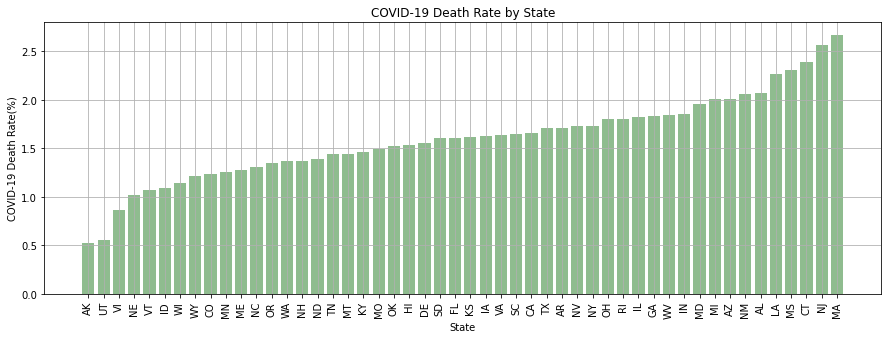

In [9]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, color='darkseagreen')
plt.grid(True)
plt.title('COVID-19 Death Rate by State')
plt.ylabel('COVID-19 Death Rate(%)')
plt.xlabel('State')
plt.xticks(rotation = 90)
#plt.savefig("../Folder4/death-rate-by-state.png")
plt.show()

In [16]:
dfff = pd.read_csv("Output/Adj_for_age_Death_Rate.csv")
dfff

,Unnamed: 0,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,0,AK,0.043606,0.063322,1.452128,0.521335,0.757045
1,1,AL,0.212372,0.207580,0.977434,2.063941,2.017367
2,2,AR,0.195009,0.189573,0.972121,1.707780,1.660169
3,3,AZ,0.213197,0.204625,0.959793,2.008587,1.927828
4,4,CA,0.159406,0.172598,1.082753,1.662034,1.799573
5,5,CO,0.111413,0.131260,1.178135,1.231980,1.451439
6,6,CT,0.222198,0.194129,0.873673,2.386855,2.085331
7,7,DE,0.146545,0.132149,0.901768,1.556439,1.403547
8,8,FL,0.150644,0.120420,0.799364,1.604283,1.282406
9,9,GA,0.158749,0.186349,1.173866,1.835143,2.154211


In [17]:
# Locate the rows which contain mice on Infubinol and get the tumor volumes

death_rate = dfff["Cum_Covid_19_Death_Rate"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
death_quartiles = death_rate.quantile([.25,.5,.75])
death_lowerq = death_quartiles[0.25]
death_upperq = death_quartiles[0.75]
death_iqr = death_upperq-death_lowerq

print(f"The lower quartile of the death rate for all states is: {round(death_lowerq,2)}")
print(f"The upper quartile of the death rate for all states is: {round(death_upperq,2)}")
print(f"The interquartile range of the death rate for all states is: {round(death_iqr,2)}")
print(f"The median of the death rate for all states is: {round(death_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
death_lower_bound = death_lowerq - (1.5*death_iqr)
death_upper_bound = death_upperq + (1.5*death_iqr)
print(f"Values below {round(death_lower_bound,2)} could be outliers.")
print(f"Values above {round(death_upper_bound,2)} could be outliers.")

The lower quartile of the death rate for all states is: 1.36
The upper quartile of the death rate for all states is: 1.84
The interquartile range of the death rate for all states is: 0.47
The median of the death rate for all states is: 1.61 
Values below 0.66 could be outliers.
Values above 2.54 could be outliers.


In [22]:
# Locate the rows which contain mice on Infubinol and get the tumor volumes

adj_rate = dfff["Adj_for_age_Covid_Death_Rate"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
adj_quartiles = adj_rate.quantile([.25,.5,.75])
adj_lowerq = adj_quartiles[0.25]
adj_upperq = adj_quartiles[0.75]
adj_iqr = adj_upperq-adj_lowerq

print(f"The lower quartile of the adjusted death rate for all states is: {round(adj_lowerq,2)}")
print(f"The upper quartile of the adjusted death rate for all states is: {round(adj_upperq,2)}")
print(f"The interquartile range of the adjusted death rate for all states is: {round(adj_iqr,2)}")
print(f"The median of the adjusted death rate for all states is: {round(adj_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
adj_lower_bound = adj_lowerq - (1.5*adj_iqr)
adj_upper_bound = adj_upperq + (1.5*adj_iqr)
print(f"Values below {round(adj_lower_bound,2)} could be outliers.")
print(f"Values above {round(adj_upper_bound,2)} could be outliers.")

The lower quartile of the adjusted death rate for all states is: 1.31
The upper quartile of the adjusted death rate for all states is: 1.89
The interquartile range of the adjusted death rate for all states is: 0.58
The median of the adjusted death rate for all states is: 1.56 
Values below 0.44 could be outliers.
Values above 2.75 could be outliers.


In [23]:
values = [death_rate, adj_rate]

In [26]:
labels = ["Death Rate", "Adjusted Death Rate"]

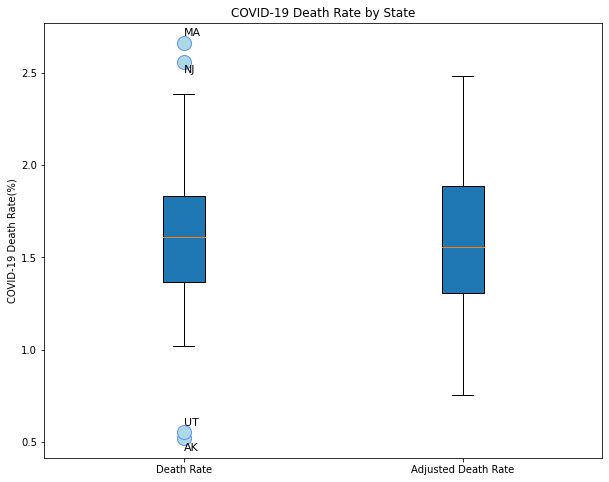

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 8))
flierprops = dict(marker='o', 
                  markersize=14, 
                  markerfacecolor='lightblue',
                  markeredgecolor='cornflowerblue')

plt.boxplot = ax1.boxplot(values, labels=labels, patch_artist=True, flierprops=flierprops)

plt.annotate('MA',
    (1, 2.7),
    xytext=(1, 2.7),
    fontsize=11)
plt.annotate('NJ',
    (1, 2.5),
    xytext=(1, 2.5),
    fontsize=11)
plt.annotate('AK',
    (1, 0.45),
    xytext=(1, 0.45),
    fontsize=11)
plt.annotate('UT',
    (1, 0.59),
    xytext=(1, 0.59),
    fontsize=11)


#for index, row in df1.iterrows():
#        print(f"{row[0]} at coords: ({row[1]})")
#        plt.annotate(row[0],row[1])
plt.title('COVID-19 Death Rate by State')
plt.ylabel('COVID-19 Death Rate(%)')
plt.savefig("Output/death-rate-boxplot.png")
plt.show()
